In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
# Read Movies csv File

moviesFP = r'C:\Users\kumar\OneDrive\Documents\Projects\MovieLens\data\external\movies.csv'
moviesDF = pd.read_csv(moviesFP)
moviesDF.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Read Ratings CSV File

ratingsFP = r'C:\Users\kumar\OneDrive\Documents\Projects\MovieLens\data\external\ratings.csv'
ratingsDF = pd.read_csv(ratingsFP)
ratingsDF.head(2)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [4]:
# Read Tasg CSV File

tagsFP = r'C:\Users\kumar\OneDrive\Documents\Projects\MovieLens\data\external\tags.csv'
tagsDF = pd.read_csv(tagsFP)
tagsDF.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [5]:
# Merge all Data Files - Common Id is UserId and MovieId

tempDF = pd.merge(ratingsDF,tagsDF,on=['userId','movieId'],how='left')
mergedDF = pd.merge(tempDF,moviesDF,on=['movieId'],how='left')
mergedDF.head(5)

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
#To Count the number of movies in each genres
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [7]:
#here we  make census of the genres:
genre_labels = set()
for s in mergedDF['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [8]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(mergedDF, 'genres', genre_labels)

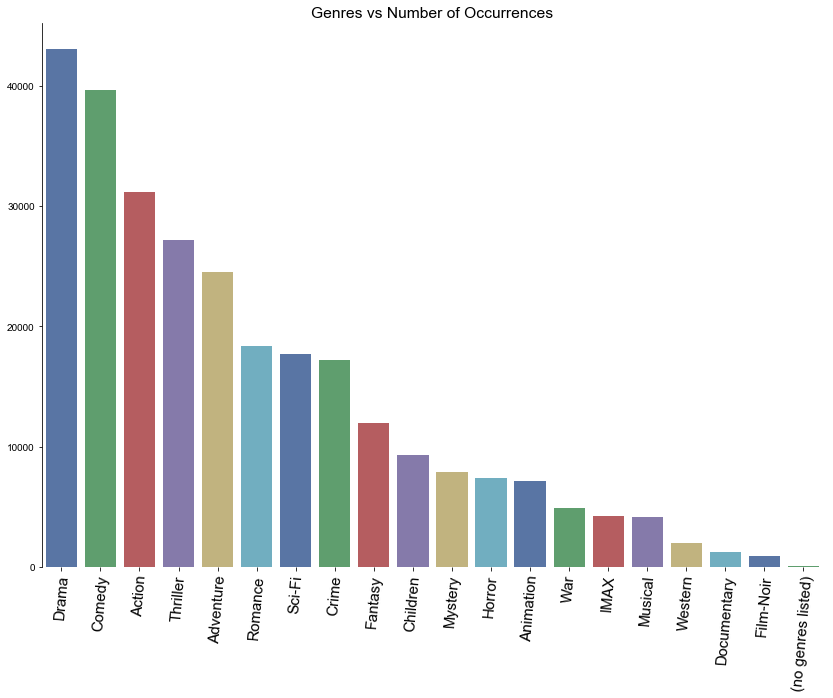

In [10]:
import seaborn as sns

x_axis=[]
y_axis=[]
fig = plt.figure(1, figsize=(14,10))
plt.xticks(rotation=85, fontsize = 15)
sns.set(style="white", context="talk")

for (key,cnt) in keyword_occurences:
    x_axis.append(key)
    y_axis.append(cnt)
sns.barplot(x_axis,y_axis, palette="deep")


plt.title("Genres vs Number of Occurrences")
sns.despine(bottom=True)

In [11]:
# Convert Genres in row to Columns
# New Column is created for every genre

tempDF = mergedDF

for (key,cnt) in keyword_occurences:
    tempDF.loc[tempDF['genres'].str.contains(key), key] = 1
    tempDF[key] = tempDF[key].fillna(0)


C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


In [12]:
tempDF['tag'] = tempDF['tag'].fillna('')

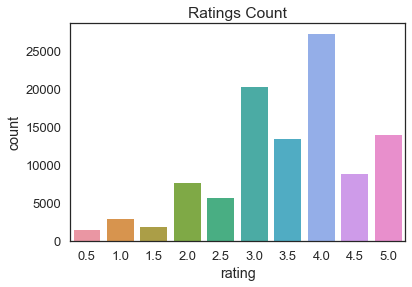

In [13]:
plt.title("Ratings Count")
sns.countplot(x=tempDF.rating,data=tempDF)

C:\Users\kumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram - Movies vs Rating Count')

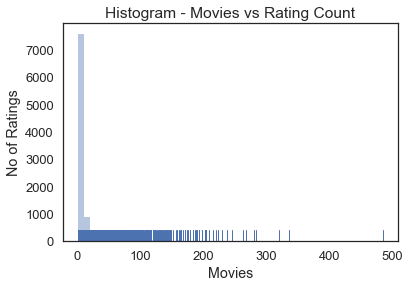

In [14]:
no_of_ratings_per_movie = tempDF.groupby(by='movieId')['rating'].count().sort_values(ascending=False)



sns.distplot(no_of_ratings_per_movie, kde=False, rug=True);

plt.xlabel('Movies')
plt.ylabel('No of Ratings')
plt.title('Histogram - Movies vs Rating Count')

C:\Users\kumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


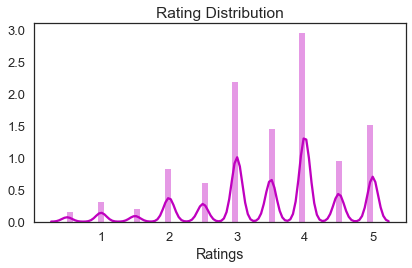

In [16]:

sns.despine(left=True)

# Plot a historgram and kernel density estimate
sns.distplot(tempDF.rating, color="m")

plt.xlabel('Ratings')
plt.title('Rating Distribution')
plt.tight_layout()

In [17]:
# Create Text From tags

text = ''

for index, row in tempDF.iterrows():
   text = text+' '+row['tag']

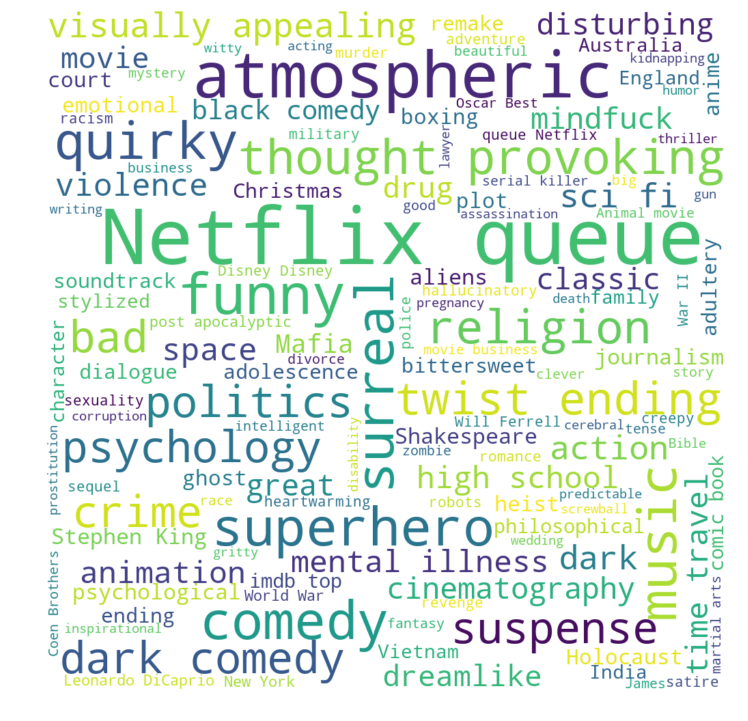

In [18]:

from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 15).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor=None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
